## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as re
import os
import datetime as dt
import scipy.stats as st

from scipy.stats import norm, normaltest
import statistics
plt.rcParams["figure.figsize"] = (15,6)

In [2]:
df_flights = pd.read_csv('flights.csv')

In [3]:
df_flights.head(5)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-10-10,AS,AS,AS,1,AS,N508AS,1,11278,DCA,...,2329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-11,G4,G4,G4,2,G4,328NV,2,12889,LAS,...,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-26,G4,G4,G4,2,G4,317NV,2,12889,LAS,...,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-12,WN,WN,WN,4,WN,N8501V,4,11259,DAL,...,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-03,DL,DL,DL,5,DL,N988DN,5,12892,LAX,...,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.isnull(df_flights).sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  365
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1249
dep_delay                1249
taxi_out                 1693
wheels_off               1693
wheels_on                1720
taxi_in                  1720
crs_arr_time                0
arr_time                 1321
arr_delay                1541
cancelled                   0
cancellation_code      108700
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1541
air_time                 1939
flights                     0
distance                    0
carrier_de

In [5]:
df_flights = df_flights.drop(['cancellation_code','carrier_delay','weather_delay',
                              'nas_delay','security_delay','late_aircraft_delay',
                              'first_dep_time','total_add_gtime','longest_add_gtime','no_name'], axis=1)

In [6]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,108751.000000,108751.000000,108307.000000,108307.000000,108280.000000,...,110000.000000,108679.000000,108459.000000,110000.000000,110000.000000,110000.000000,108459.000000,108061.000000,110000.0,110000.000000
mean,489.987082,489.987082,12768.512618,12809.422991,1350.595182,1352.232265,10.017333,16.757440,1371.661361,1473.876690,...,1499.980273,1474.859918,4.846301,0.011818,0.002191,164.757091,159.793120,135.722601,1.0,1010.851364
std,160.153940,160.153940,1485.889048,1476.413852,506.229460,520.757819,44.368953,9.541295,523.680296,559.965879,...,544.223818,565.580912,46.700287,0.108068,0.046756,85.769541,85.321869,81.910786,0.0,689.765928
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-38.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,-84.000000,0.000000,0.000000,18.000000,15.000000,8.000000,1.0,16.000000
25%,382.000000,382.000000,11292.000000,11298.000000,925.000000,924.000000,-6.000000,11.000000,936.000000,1047.000000,...,1105.000000,1049.000000,-15.000000,0.000000,0.000000,100.000000,96.000000,74.000000,1.0,488.000000
50%,516.000000,516.000000,12892.000000,12892.000000,1336.000000,1341.000000,-2.000000,14.000000,1353.000000,1521.000000,...,1535.000000,1523.000000,-6.000000,0.000000,0.000000,150.000000,144.000000,120.000000,1.0,868.000000
75%,625.000000,625.000000,14100.000000,14100.000000,1759.000000,1805.000000,7.000000,19.000000,1820.000000,1936.000000,...,1943.000000,1938.000000,8.000000,0.000000,0.000000,208.000000,203.000000,177.000000,1.0,1400.000000
max,716.000000,716.000000,15991.000000,15991.000000,2359.000000,2400.000000,1418.000000,227.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,1402.000000,1.000000,1.000000,703.000000,723.000000,696.000000,1.0,5095.000000


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [7]:
#Get the mean & std of arr_delay column.
mean_arr_delay = df_flights.arr_delay.mean()
std_arr_delay = df_flights.arr_delay.std()

In [8]:
#Print mean & std
print('Mean:',mean_arr_delay)
print('STD:',std_arr_delay)

Mean: 4.846301367336966
STD: 46.70028748483558


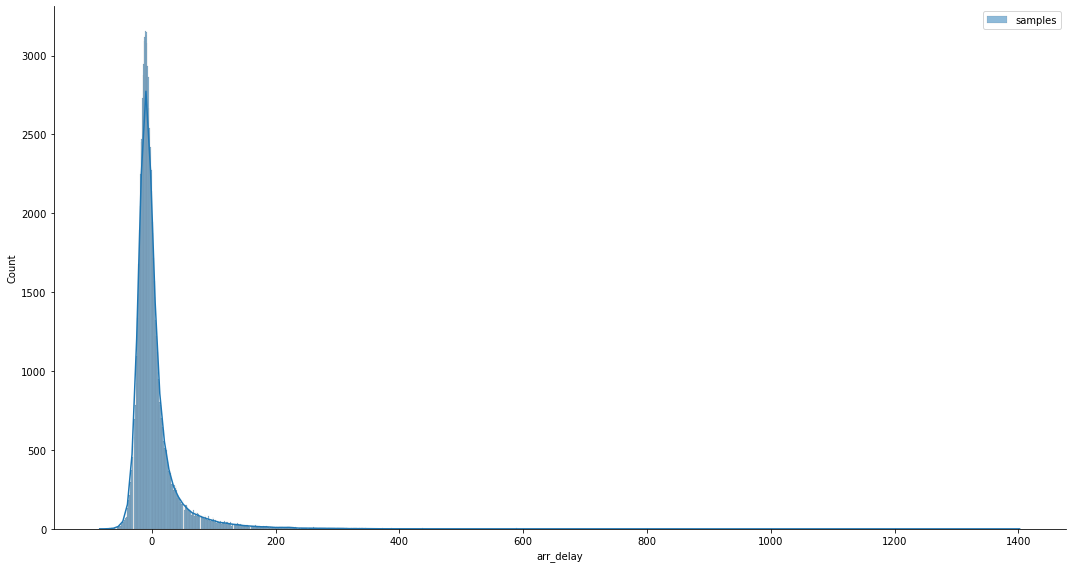

In [9]:
sns.displot(df_flights.arr_delay, kde=True, height = 8, aspect=15/8, label='samples')
plt.legend()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arr_delay'>

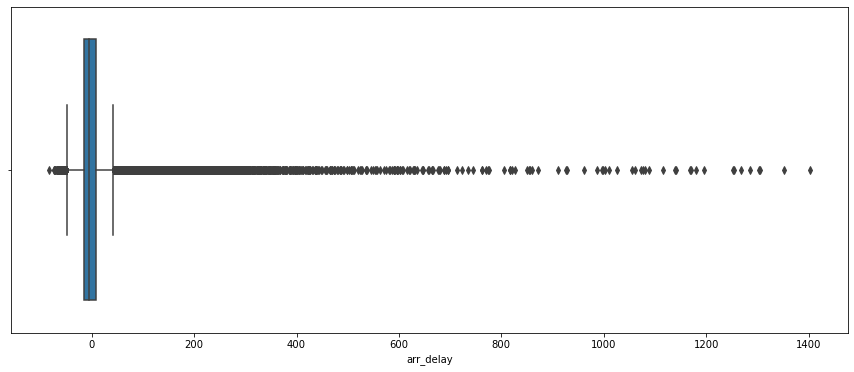

In [10]:
#To Visualize Outliers, outliers are between the 2 short lines.
#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
sns.boxplot(df_flights.arr_delay)

In [11]:
mean_dep_delay = df_flights.dep_delay.mean()
std_dep_delay = df_flights.dep_delay.std()

In [12]:
print('Mean:',mean_dep_delay)
print('STD:',std_dep_delay)

Mean: 10.017333173947826
STD: 44.36895262488831


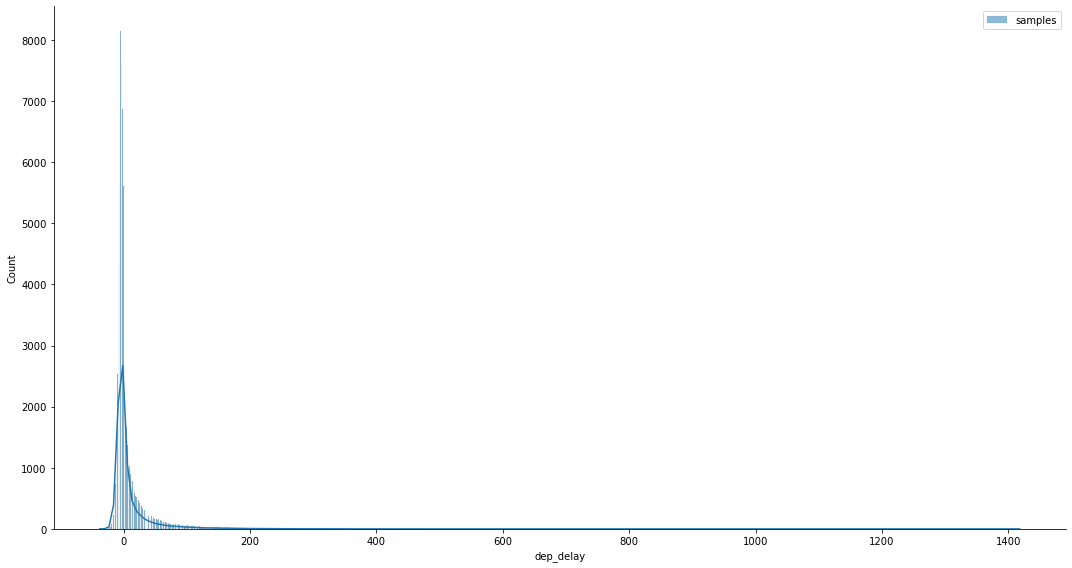

In [13]:
sns.displot(df_flights.dep_delay, kde=True, height = 8, aspect=15/8, label='samples')
plt.legend()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arr_delay'>

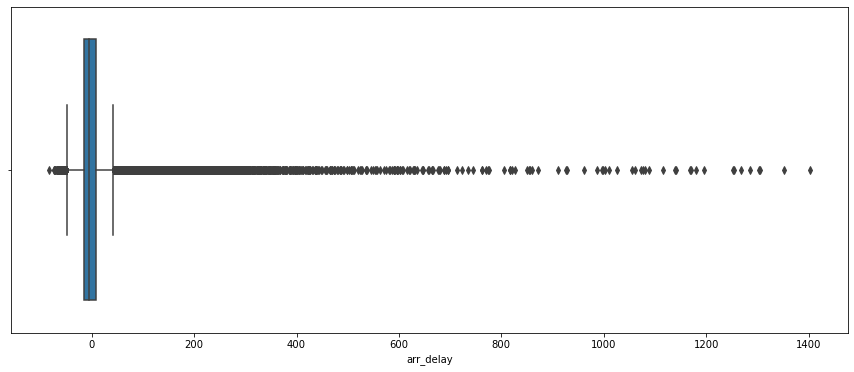

In [14]:
sns.boxplot(df_flights.arr_delay)

In [15]:
#Test the hypothesis that the delay is from Normal distribution
stat, p_value = normaltest(df_flights['arr_delay'])
alpha = 0.5 
print('Null hypothesis: It is not significant that the delay comes from a normal distribution.')
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


Null hypothesis: It is not significant that the delay comes from a normal distribution.
The null hypothesis cannot be rejected


In [16]:
#Test the hypothesis that the mean of the delay is 0
mu  = 0
t_value,p_value=st.ttest_1samp(df_flights['arr_delay'].dropna(),mu)
one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.
alpha = 0.05
print('Null hypothesis: It is not significant that mean of the delay is 0.')
if one_tailed_p_value<=alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Null hypothesis: It is not significant that mean of the delay is 0.
The null hypothesis can be rejected


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [17]:
df_flights['datetime'] = pd.to_datetime(df_flights.fl_date)
df_flights['day'] = df_flights['datetime'].dt.day
df_flights['month'] = df_flights['datetime'].dt.month
df_flights['year'] = df_flights['datetime'].dt.year

In [18]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,day,month,year
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,108751.000000,108751.000000,108307.000000,108307.000000,108280.000000,...,110000.000000,110000.000000,110000.000000,108459.000000,108061.000000,110000.0,110000.000000,110000.000000,110000.000000,110000.00000
mean,489.987082,489.987082,12768.512618,12809.422991,1350.595182,1352.232265,10.017333,16.757440,1371.661361,1473.876690,...,0.011818,0.002191,164.757091,159.793120,135.722601,1.0,1010.851364,15.683655,6.481527,2018.51150
std,160.153940,160.153940,1485.889048,1476.413852,506.229460,520.757819,44.368953,9.541295,523.680296,559.965879,...,0.108068,0.046756,85.769541,85.321869,81.910786,0.0,689.765928,8.764272,3.381186,0.49987
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-38.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,18.000000,15.000000,8.000000,1.0,16.000000,1.000000,1.000000,2018.00000
25%,382.000000,382.000000,11292.000000,11298.000000,925.000000,924.000000,-6.000000,11.000000,936.000000,1047.000000,...,0.000000,0.000000,100.000000,96.000000,74.000000,1.0,488.000000,8.000000,4.000000,2018.00000
50%,516.000000,516.000000,12892.000000,12892.000000,1336.000000,1341.000000,-2.000000,14.000000,1353.000000,1521.000000,...,0.000000,0.000000,150.000000,144.000000,120.000000,1.0,868.000000,16.000000,6.000000,2019.00000
75%,625.000000,625.000000,14100.000000,14100.000000,1759.000000,1805.000000,7.000000,19.000000,1820.000000,1936.000000,...,0.000000,0.000000,208.000000,203.000000,177.000000,1.0,1400.000000,23.000000,9.000000,2019.00000
max,716.000000,716.000000,15991.000000,15991.000000,2359.000000,2400.000000,1418.000000,227.000000,2400.000000,2400.000000,...,1.000000,1.000000,703.000000,723.000000,696.000000,1.0,5095.000000,31.000000,12.000000,2019.00000


In [19]:
mean_month_arr_delay = df_flights.groupby('month', as_index=False)['arr_delay'].mean()
print(mean_month_arr_delay)

    month  arr_delay
0       1   2.063847
1       2   4.956285
2       3   2.013912
3       4   3.821460
4       5   6.231096
5       6   9.366814
6       7  10.141681
7       8   9.817083
8       9   0.967979
9      10   1.067455
10     11   2.286828
11     12   3.772143


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

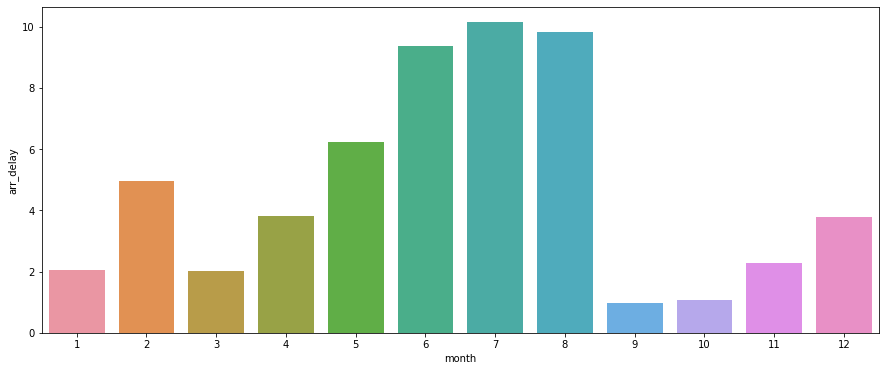

In [20]:
sns.barplot(x='month',y='arr_delay',data=mean_month_arr_delay)

In [21]:
mean_month_dep_delay = df_flights.groupby('month',as_index=False)['dep_delay'].mean()
print(mean_month_dep_delay)

    month  dep_delay
0       1   7.985433
1       2   9.845290
2       3   8.048071
3       4   9.202152
4       5  11.052860
5       6  13.778244
6       7  15.109133
7       8  14.058331
8       9   6.758074
9      10   6.188426
10     11   7.544092
11     12   9.181235


<AxesSubplot:xlabel='month', ylabel='dep_delay'>

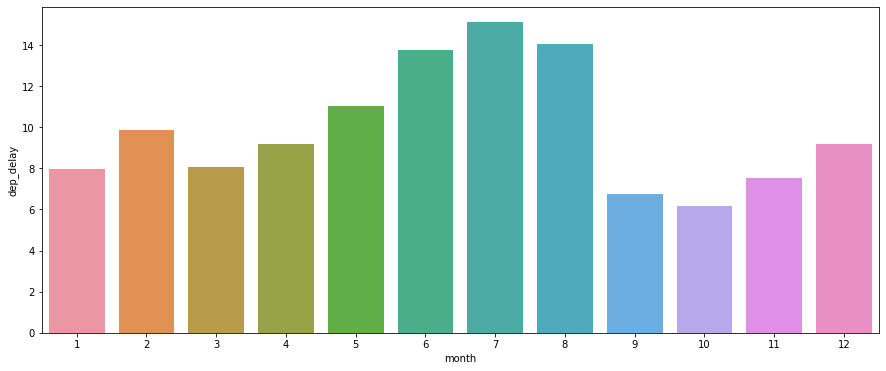

In [22]:
sns.barplot(x='month',y='dep_delay',data=mean_month_dep_delay)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [259]:
city_df = df_flights.drop_duplicates('origin_city_name')[['origin_city_name','fl_date']]

In [24]:
city_df_sample = city_df.sample(100)

In [260]:
weather_data = city_df_sample.values.tolist()

In [261]:
weather = []
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history"
api_key = os.environ["VISUAL_CROSSSING"]

for i in weather_data:
    
    start_date = dt.datetime.strptime(i[1], "%Y-%m-%d")
    end_date = start_date + dt.timedelta(days=1)

    
    querystring = {"contentType":"json",
               "startDateTime":f"{str(start_date.date())}T00:00:00",
               "aggregateHours":"24","location":f"{i[0]}",
               "endDateTime":f"{str(end_date.date())}T00:00:00",
               "unitGroup":"us",
               "key":api_key}
    
    res = re.request("GET", url, params=querystring)
    weather.append(res.json())

In [262]:
weather_list = []
for i in range(len(weather_data)):
    if i == None:
        pass
    else:
        weather_list.append(weather[i]['locations'][weather_data[i][0]]['values'][0]['conditions'])

In [263]:
city_df_sample['weather'] = weather_list
city_df_sample.head()

,origin_city_name,fl_date,weather
19955,"Jackson/Vicksburg, MS",2019-12-05,Clear
11,"Honolulu, HI",2018-12-24,"Rain, Overcast"
21140,"Christiansted, VI",2018-10-06,Clear
4433,"Richmond, VA",2018-11-01,Partially cloudy
635,"Amarillo, TX",2018-05-09,Clear


In [264]:
weather_sampledf = pd.merge(city_df_sample, df_flights[['dep_delay','arr_delay']], left_index=True, right_index=True)

In [265]:
weather_sampledf.sort_values('arr_delay',ascending=False)

,origin_city_name,fl_date,weather,dep_delay,arr_delay
794,"Stockton, CA",2019-05-20,Partially cloudy,830.0,820.0
30469,"Sanford, FL",2019-03-04,"Rain, Partially cloudy",274.0,265.0
9936,"Asheville, NC",2018-09-18,Partially cloudy,182.0,190.0
8209,"Manchester, NH",2019-08-16,Partially cloudy,111.0,110.0
4433,"Richmond, VA",2018-11-01,Partially cloudy,3.0,72.0
...,...,...,...,...,...
654,"Ketchikan, AK",2018-05-20,"Rain, Overcast",-19.0,-26.0
94826,"Ponce, PR",2019-02-08,Rain,-16.0,-26.0
4043,"Adak Island, AK",2018-07-07,Partially cloudy,-8.0,-26.0
6862,"Lafayette, LA",2019-07-03,Rain,-1.0,-29.0


In [266]:
weather_sampledf.sort_values('dep_delay',ascending=False)

,origin_city_name,fl_date,weather,dep_delay,arr_delay
794,"Stockton, CA",2019-05-20,Partially cloudy,830.0,820.0
30469,"Sanford, FL",2019-03-04,"Rain, Partially cloudy",274.0,265.0
9936,"Asheville, NC",2018-09-18,Partially cloudy,182.0,190.0
8209,"Manchester, NH",2019-08-16,Partially cloudy,111.0,110.0
32,"San Diego, CA",2018-04-14,Clear,97.0,71.0
...,...,...,...,...,...
94826,"Ponce, PR",2019-02-08,Rain,-16.0,-26.0
335,"Bethel, AK",2018-12-03,"Rain, Partially cloudy",-18.0,-19.0
1541,"Saipan, TT",2019-04-30,"Rain, Partially cloudy",-18.0,-24.0
654,"Ketchikan, AK",2018-05-20,"Rain, Overcast",-19.0,-26.0


<AxesSubplot:xlabel='weather', ylabel='arr_delay'>

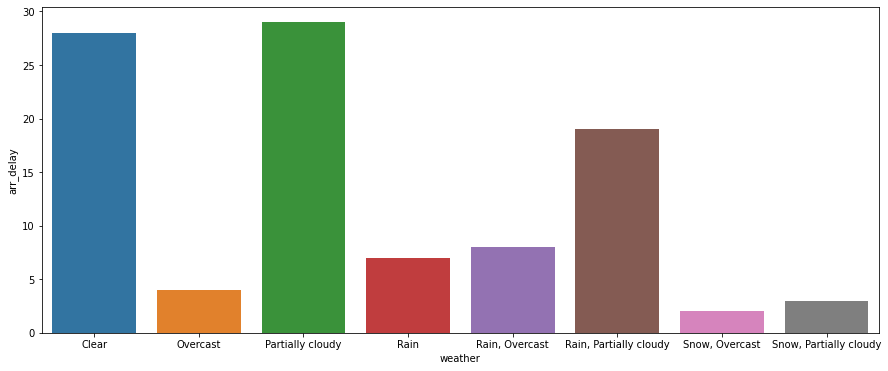

In [267]:
weather_arr_delay = weather_sampledf.groupby('weather',as_index=False)['arr_delay'].count()
sns.barplot(x='weather',y='arr_delay',data=weather_arr_delay)

<AxesSubplot:xlabel='weather', ylabel='dep_delay'>

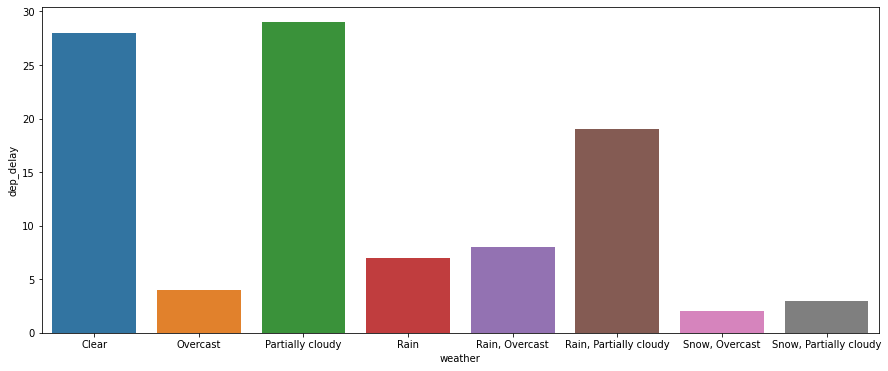

In [268]:
weather_dep_delay = weather_sampledf.groupby('weather',as_index=False)['dep_delay'].count()
sns.barplot(x='weather',y='dep_delay',data=weather_dep_delay)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [269]:
df_taxi = df_flights[['fl_date','taxi_out','origin','dep_time']]

In [270]:
df_taxi.sort_values(by=['fl_date'])

,fl_date,taxi_out,origin,dep_time
63391,2018-01-01,21.0,PHX,1629.0
42260,2018-01-01,20.0,FLL,2104.0
67947,2018-01-01,11.0,MKE,609.0
53758,2018-01-01,10.0,PVD,640.0
24264,2018-01-01,15.0,SJC,1436.0
...,...,...,...,...
43507,2019-12-31,25.0,JFK,827.0
95275,2019-12-31,14.0,DEN,2043.0
35882,2019-12-31,12.0,MCO,2229.0
45672,2019-12-31,10.0,LGA,948.0


In [271]:
df_taxi[['fl_date','origin','taxi_out','dep_time']].groupby(['origin','fl_date','dep_time']).sum()

taxi_out
origin fl_date    dep_time          
ABE    2018-01-02 1848.0         6.0
       2018-03-02 1029.0        12.0
       2018-03-05 1007.0        12.0
       2018-03-24 1747.0        11.0
       2018-05-25 1550.0         8.0
...                              ...
YAK    2019-05-07 1821.0        14.0
       2019-06-04 1805.0        10.0
       2019-08-09 1822.0        12.0
       2019-08-27 1843.0         5.0
       2019-12-23 1816.0        20.0

[108549 rows x 1 columns]

<AxesSubplot:ylabel='origin,fl_date,dep_time'>

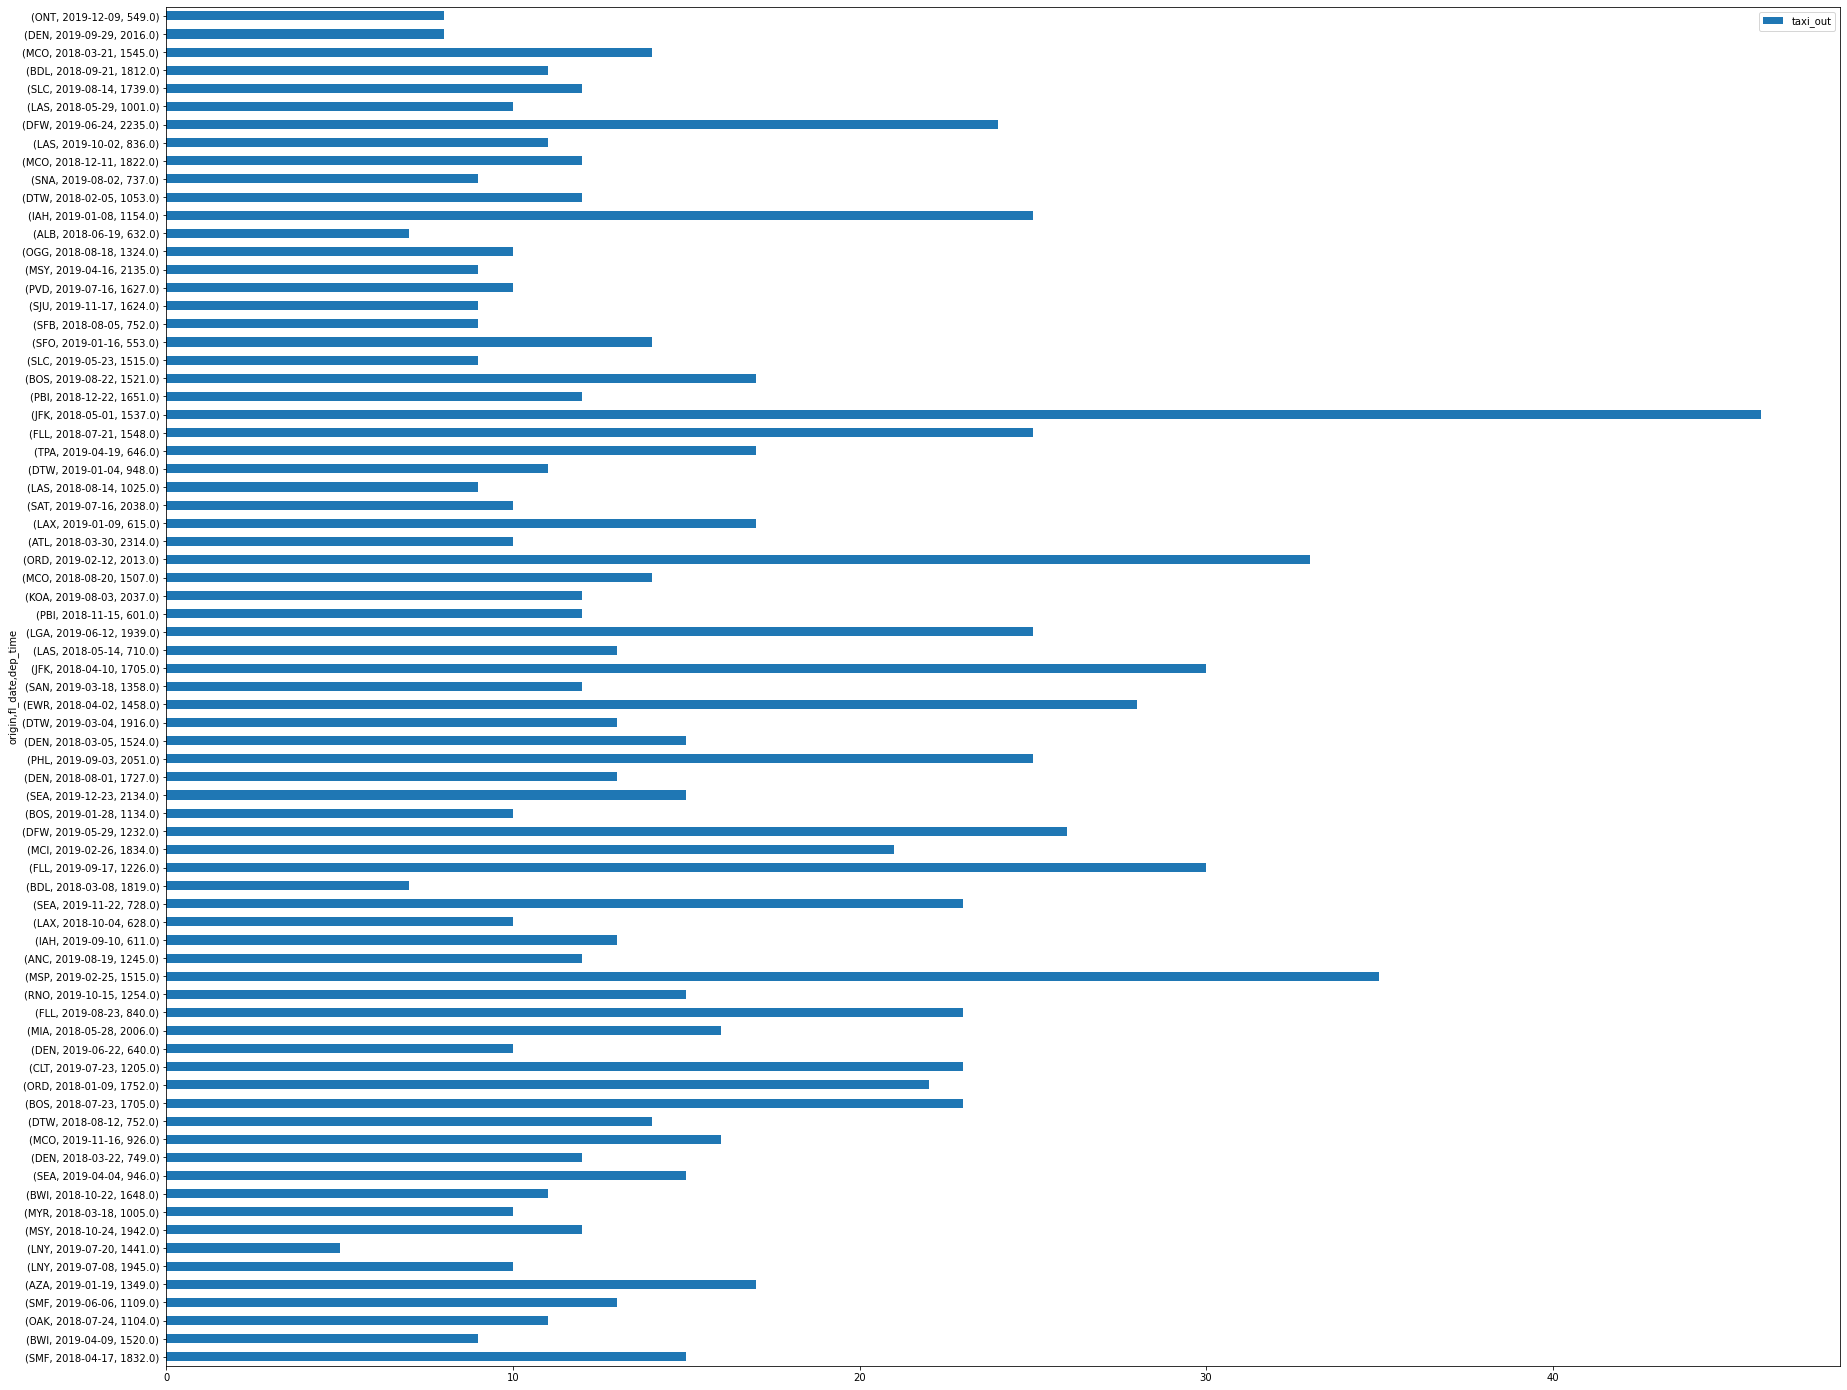

In [249]:
#Since there are a large number of rows we will use a sample of 150.
df_taxi_sample = df_taxi.sample(150)
# plot data, sample of 75.
df_taxi_sample = df_taxi_sample[['fl_date','origin','dep_time','taxi_out']].groupby(['origin','fl_date','dep_time']).sum().sample(75)
df_taxi_sample.plot.barh(figsize=(30, 25))

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [38]:
#Print Mean and Max of dep_delay column
print("Mean:",df_flights['dep_delay'].mean())
print("Max:", df_flights['dep_delay'].max())

#Mean percentage = (Mean/Highest Number) * 100
print("Average Percentage of delays that is already created before departure:",(df_flights['dep_delay'].mean()/df_flights['dep_delay'].max())*100)

Mean: 10.017333173947826
Max: 1418.0
Average Percentage of delays that is already created before departure: 0.7064409854688171


In [39]:
import warnings
warnings.filterwarnings('ignore')

#Columns to be aware of are the following: actual_elapsed_time & air_time.
#Airlines are able to reduce the delay during the flights if they are able to reduce the 
#diference between the actual elapsed time of the flight and the air time.

df_tsk5 = df_flights[['mkt_unique_carrier','actual_elapsed_time','air_time']]
df_tsk5['time_difference'] = df_flights['actual_elapsed_time'] - df_flights['air_time']
df_tsk5.head(3)

,mkt_unique_carrier,actual_elapsed_time,air_time,time_difference
0,AS,321.0,294.0,27.0
1,G4,68.0,45.0,23.0
2,G4,227.0,208.0,19.0


<AxesSubplot:xlabel='mkt_unique_carrier', ylabel='time_difference'>

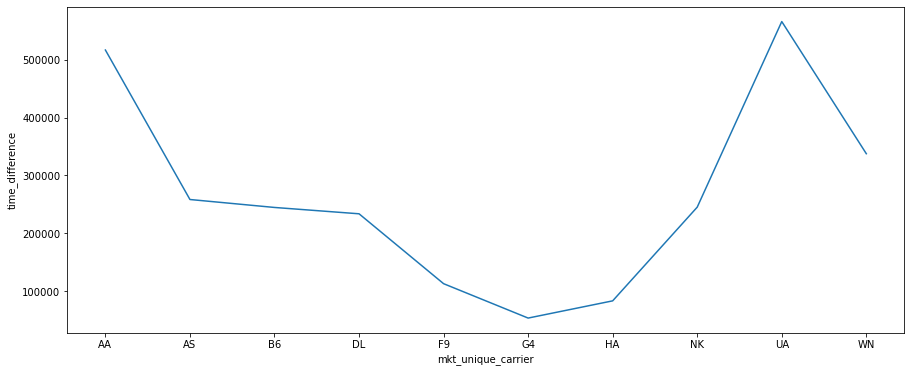

In [40]:
#Sum of the total time differences by airline. 
#If an airline is able to reduce their time differnece between the actual elapsed time and the air time,
#they may be able to lower their delay during flights.

df_tsk5show = df_tsk5[['mkt_unique_carrier','time_difference']].groupby('mkt_unique_carrier',as_index=False)['time_difference'].sum()
sns.lineplot(x='mkt_unique_carrier',y='time_difference',data=df_tsk5show)

#### **Task 6**: How many states cover 50% of US air traffic? 

In [41]:
#Take relevant columns
#Split origin_city_name to a State column
#Sum the air_traffic and groupby state.
#Sort in descending order.

df_tsk6 = df_flights[['origin_city_name','air_time']]
df_tsk6[['origin_city_name','state']] = df_tsk6['origin_city_name'].str.split(', ',expand=True)
df_tsk6show = df_tsk6.groupby('state',as_index=False)['air_time'].sum().sort_values(by='air_time',ascending=False)

In [252]:
print("Total air Traffic per state for sample size:",df_tsk6show['air_time'].sum())
print("50% of air Traffic per state for sample size:",df_tsk6show['air_time'].sum()/2)
print("Top 6 States cover 50% of US traffic:",df_tsk6show['air_time'].head(6).sum())

Total air Traffic per state for sample size: 14666320.0
50% of air Traffic per state for sample size: 7333160.0
Top 6 States cover 50% of US traffic: 7198767.0


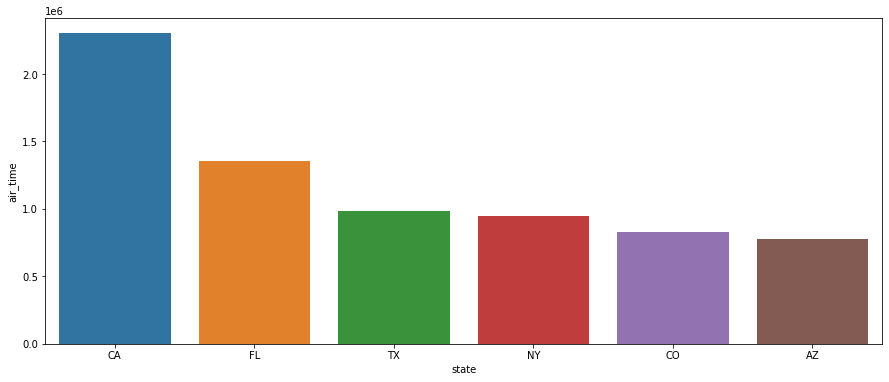

In [47]:
sns.barplot(x='state',y='air_time',data=df_tsk6show.head(6))
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [48]:
import warnings
warnings.filterwarnings('ignore')

#Relevant columns: dep_delay, air_time, distance
#Append a column called avg_speed.
#Average speed = (air_time/distance) * 60
#Sort values deep_delay to see weather planes fly faster when there is a departure delay.

df_tsk7 = df_flights[['dep_delay','air_time','distance']].dropna()
df_tsk7['avg_speed'] = (df_flights['distance'] / df_flights['air_time'])*60
df_tsk7.sort_values(by='dep_delay',ascending=False).head(10)

,dep_delay,air_time,distance,avg_speed
26447,1418.0,191.0,1725,541.884817
104256,1314.0,340.0,2979,525.705882
7731,1306.0,203.0,1303,385.123153
96350,1294.0,148.0,1452,588.648649
10448,1284.0,40.0,247,370.500000
78478,1266.0,377.0,2586,411.564987
22979,1265.0,100.0,811,486.600000
27670,1251.0,310.0,2585,500.322581
36272,1186.0,170.0,1477,521.294118
13915,1179.0,298.0,2556,514.630872


In [49]:
#Test the hypothesis whether planes fly faster when there is a departure delay.
dep_delay_lst = df_tsk7['dep_delay']
avg_speed_lst = df_tsk7['avg_speed']
stat, p_value = st.ttest_rel(dep_delay_lst,avg_speed_lst)
alpha=0.5
print('stat:',stat)
print('p-value:',p_value)
if p_value > alpha:
    print("Planes fly faster when there is a departure delay.")
else:
    print("Plane speed did not change significantly when there is a departure delay.")

stat: -1686.6233928852496
p-value: 0.0
Plane speed did not change significantly when there is a departure delay.


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [50]:
#Algorithm to convert float to time format.
string_num = []
for i in df_flights['dep_time']:
    str_time = str(i)
    if len(str_time) == 4:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:1] + ":" + str_time[1:]
        string_num.append('00:00')
    elif len(str_time) == 5:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:1] + ":" + str_time[1:]
        string_num.append(str_time)
    elif len(str_time) == 6:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:2] + ":" + str_time[2:]
        string_num.append(str_time)
    else:
        string_num.append('--:--')

In [51]:
#Algorithm to create categories of LONG, SHORT, MEDIUM.
category_list = []
for i in df_flights['air_time']:
    if i <= 180:
        category_list.append('SHORT')
    elif i > 180 and i <= 360:
        category_list.append('MEDIUM')
    elif i > 360:
        category_list.append('LONG')
    else:
        category_list.append('NOT_APPLICABLE')

In [78]:
#Assign the list to the dataframe.
df_tsk8 = df_flights[['dep_time','air_time','distance']]
df_tsk8['time_format'] = string_num
df_tsk8['haul_type'] = category_list
df_tsk8[['time_hour','time_second']] = df_tsk8['time_format'].str.split(':',expand=True)
#df_tsk8 = df_tsk8.dropna()
df_tsk8.head(3)

,dep_time,air_time,distance,time_format,haul_type,time_hour,time_second
0,752.0,294.0,2329,7:52,MEDIUM,7,52
1,1456.0,45.0,259,14:56,SHORT,14,56
2,2350.0,208.0,1510,23:50,MEDIUM,23,50


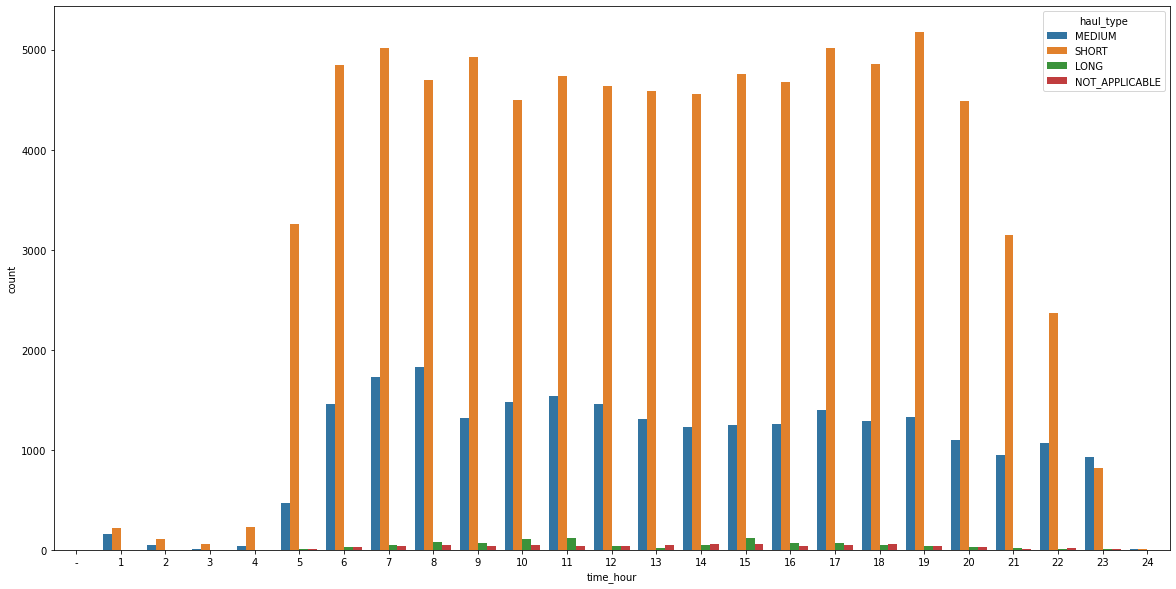

In [80]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x="time_hour", hue="haul_type", data=df_tsk8, 
              order = ['-','1', '2', '3', '4', '5',
               '6','7','8','9','10','11',
              '12','13','14','15','16','17',
              '18','19','20','21','22','23','24'])
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [120]:
df_tsk9 = df_flights.groupby(['origin'],as_index=False).size()

In [121]:
#Top 10 busiest airports by biggest number of flights.
df_tsk9 = df_tsk9.sort_values(by=['size'],ascending=False)
df_tsk9 = df_tsk9.rename(columns={'size':'number_of_flights'})
df_tsk9.head(10)

,origin,number_of_flights
55,DEN,6465
202,SEA,4755
117,LAX,4722
171,PHX,4720
160,ORD,4592
116,LAS,3552
11,ATL,3533
204,SFO,3403
27,BOS,3074
45,CLT,2991


In [126]:
df_passengers = pd.read_csv('passengers.csv')
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,6,6,12000,1,0,1953,0,114,288,216,...,US,United States,1,133,2,2015,5,1,F,DU
1,6,6,18000,1,0,5045,0,114,294,222,...,US,United States,4,404,2,2015,5,1,F,DU
2,6,6,1639800,0,0,227047,0,1815,1530,1283,...,EC,Ecuador,8,820,2,2015,10,4,G,IU
3,6,6,1212000,0,0,1026801,0,1388,1235,1039,...,US,United States,7,740,2,2015,11,3,G,IU
4,6,6,1212000,0,0,222464,0,1388,1266,1032,...,CO,Colombia,7,740,2,2015,11,3,G,IU


In [128]:
df_tsk9b = df_passengers[['passengers','origin_airport_id','origin','origin_city_name']]
df_tsk9b = df_tsk9b.sort_values(by=['passengers'], ascending=False)

In [129]:
#Top 10 busiest airports by passenger traffic.
df_tsk9b = df_tsk9b.groupby(['origin_airport_id','origin','origin_city_name'],as_index=False)[['passengers']].sum()
df_tsk9b = df_tsk9b.sort_values(by=['passengers'], ascending=False)
df_tsk9b = df_tsk9b.rename(columns={'passengers':'total_passengers'})
df_tsk9b.head(10)

,origin_airport_id,origin,origin_city_name,total_passengers
456,13930,ORD,"Chicago, IL",7580294
156,11292,DEN,"Denver, CO",7285747
39,10397,ATL,"Atlanta, GA",6779152
286,12266,IAH,"Houston, TX",5465448
336,12892,LAX,"Los Angeles, CA",5080153
416,13487,MSP,"Minneapolis, MN",4848615
168,11433,DTW,"Detroit, MI",4735339
307,12478,JFK,"New York, NY",4282239
477,14107,PHX,"Phoenix, AZ",4281457
196,11618,EWR,"Newark, NJ",4280150


In [136]:
#The Top 10 busiest airports by the biggest number of flights and the passenger traffic they cover.
pd.merge(df_tsk9.head(10),df_tsk9b,how = "left", on = "origin")

,origin,number_of_flights,origin_airport_id,origin_city_name,total_passengers
0,DEN,6465,11292,"Denver, CO",7285747
1,SEA,4755,14747,"Seattle, WA",4210105
2,LAX,4722,12892,"Los Angeles, CA",5080153
3,PHX,4720,14107,"Phoenix, AZ",4281457
4,ORD,4592,13930,"Chicago, IL",7580294
5,LAS,3552,12889,"Las Vegas, NV",4247530
6,ATL,3533,10397,"Atlanta, GA",6779152
7,SFO,3403,14771,"San Francisco, CA",4035491
8,BOS,3074,10721,"Boston, MA",2274678
9,CLT,2991,11057,"Charlotte, NC",3323671


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [138]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'datetime', 'day', 'month', 'year'],
      dtype='object')

In [256]:
#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
df_tsk10a = df_flights.groupby(['month','op_unique_carrier'])[['arr_delay']].agg('mean')
df_tsk10a.head(11)

arr_delay
month op_unique_carrier           
1     AA                  1.549623
      AS                 -3.911924
      B6                 15.841026
      DL                 -5.216336
      EM                  0.145833
      F9                  6.414729
      G4                 10.357143
      HA                 -1.237654
      NK                 -1.935882
      UA                  4.806748
      WN                 -0.608199

<AxesSubplot:xlabel='month'>

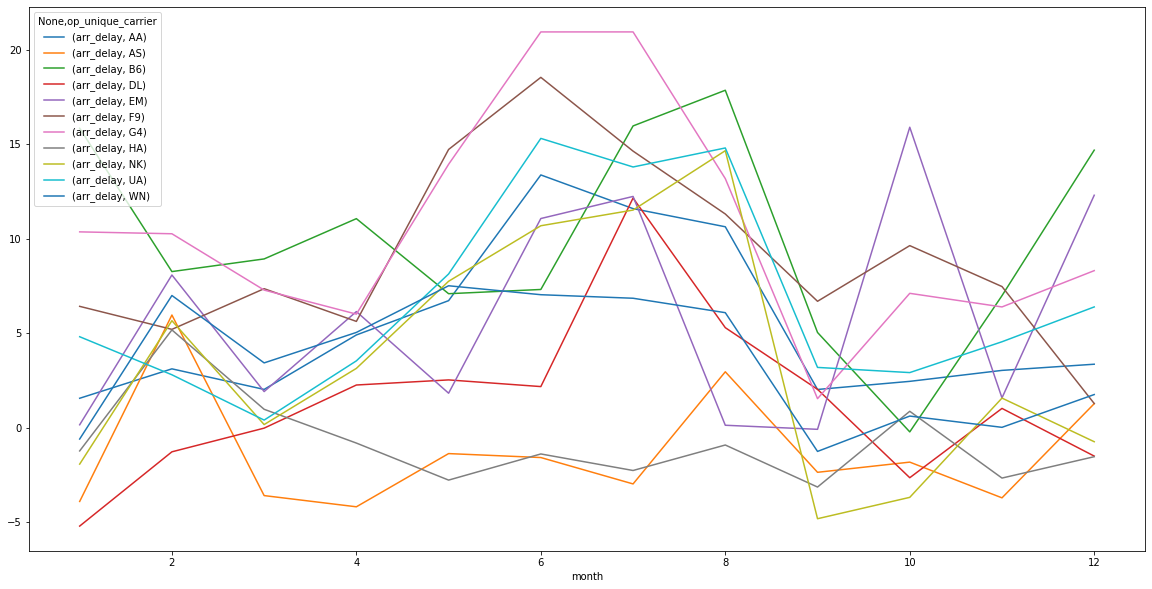

In [163]:
df_tsk10a.unstack().plot()

In [166]:
#Find out the distance covered monthly by different air carriers
df_tsk10b = df_flights.groupby(['month','op_unique_carrier'])[['distance']].agg('sum')
df_tsk10b.head(11)

distance
month op_unique_carrier          
1     AA                  1843936
      AS                   758333
      B6                  1007067
      DL                   493251
      EM                     3708
      F9                   264866
      G4                   188866
      HA                    75997
      NK                   842991
      UA                  1903159
      WN                  1415603

<AxesSubplot:xlabel='month'>

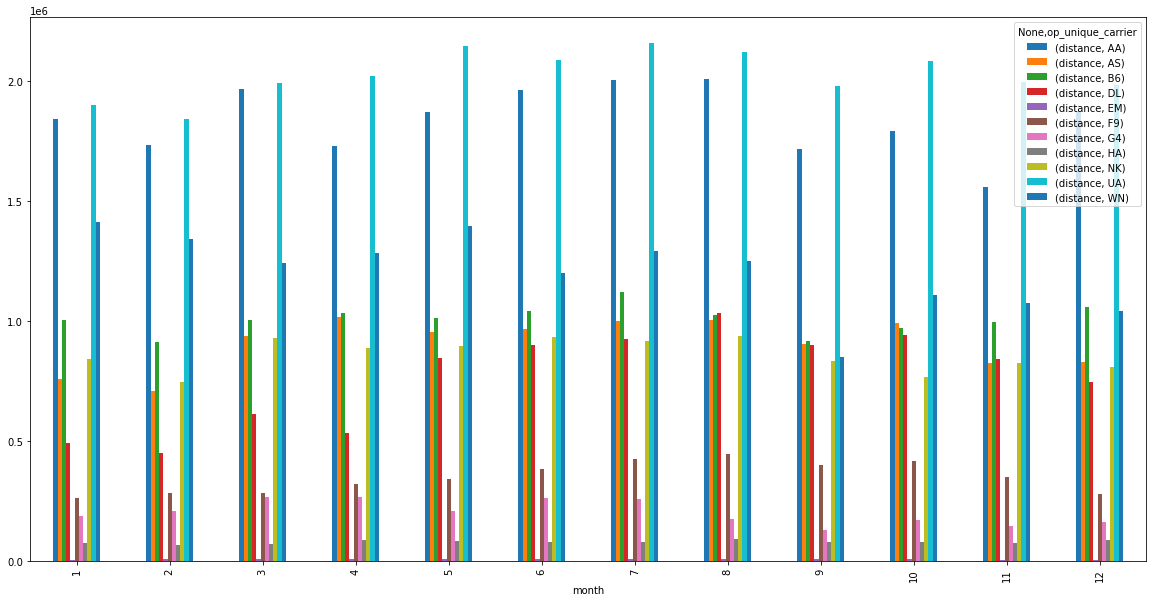

In [178]:
df_tsk10b.unstack().plot.bar()

In [232]:
#Find out the number of passengers that were carried by different air carriers
df_tsk10c = df_passengers.groupby(['unique_carrier_name','unique_carrier'])[['passengers']].agg('sum').reset_index()
df_tsk10c = df_tsk10c[(df_tsk10c != 0).all(1)]
df_tsk10c.head(50)

,unique_carrier_name,unique_carrier,passengers
1,"Air Charter, Inc d/b/a Air Flamenco",1YQ,1219
2,Air Sunshine Inc.,AAT,7147
3,Air Wisconsin Airlines Corp,ZW,658339
4,Alaska Airlines Inc.,AS,9386926
5,Allegiant Air,G4,7917161
7,American Airlines Inc.,AA,17682770
10,Boutique Air,4B,5255
11,Cape Air,9K,12739
12,"Commutair Aka Champlain Enterprises, Inc.",C5,336734
13,Compass Airlines,CP,868510


In [202]:
df_fuel_consum = pd.read_csv('fuel_consumption.csv')
df_fuel_consum.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


In [231]:
#Find out total fuel comsumption per air carrier
df_tsk10d = df_fuel_consum.groupby(['carrier_name','unique_carrier'])[['total_gallons']].agg('sum').reset_index()
df_tsk10d = df_tsk10d[(df_tsk10d != 0).all(1)]
df_tsk10d.head(60)

,carrier_name,unique_carrier,total_gallons
0,ABX Air Inc,ABX,6.367883e+06
1,Air Transport International,8C,4.061171e+07
2,Air Wisconsin Airlines Corp,ZW,1.306834e+08
3,Alaska Airlines Inc.,AS,2.678455e+09
4,Allegiant Air,G4,8.497621e+08
5,Aloha Air Cargo,KH,2.405682e+07
6,American Airlines Inc.,AA,1.663489e+10
7,Amerijet International,M6,1.109990e+08
8,Asia Pacific,PFQ,1.841684e+07
9,Atlas Air Inc.,5Y,2.152912e+09


In [230]:
df_tsk10e = df_flights.groupby(['op_unique_carrier'])[['distance']].agg('sum').reset_index()
df_tsk10e = df_tsk10e.rename(columns={'op_unique_carrier':'unique_carrier'})
df_tsk10e.head(11)

,unique_carrier,distance
0,AA,22086635
1,AS,10902554
2,B6,12111001
3,DL,9233623
4,EM,80005
5,F9,4199627
6,G4,2453219
7,HA,963375
8,NK,10325383
9,UA,24331022


In [247]:
#Get the average fuel comsumption per passenger per km.(fuel_econ_per_passenger)
#https://wiki.ubc.ca/Course:PHYS100/Fuel_Economy_in_Air_Travel
df_tsk10f = pd.merge(df_tsk10d,df_tsk10c,how = "left", on = "unique_carrier").dropna()
df_tsk10f = pd.merge(df_tsk10e,df_tsk10f,how = "left", on = "unique_carrier").dropna()
df_tsk10f['fuel_econ_per_passenger'] = (df_tsk10f['total_gallons'] / df_tsk10f['distance']) / df_tsk10f['passengers']
df_tsk10f = df_tsk10f.drop(['carrier_name'], axis=1)

In [248]:
df_tsk10f.head(10)

,unique_carrier,distance,total_gallons,unique_carrier_name,passengers,fuel_econ_per_passenger
0,AA,22086635,1.663489e+10,American Airlines Inc.,17682770.0,0.000043
1,AS,10902554,2.678455e+09,Alaska Airlines Inc.,9386926.0,0.000026
2,B6,12111001,3.767060e+09,JetBlue Airways,7752574.0,0.000040
3,DL,9233623,1.655025e+10,Delta Air Lines Inc.,26351639.0,0.000068
5,F9,4199627,1.125294e+09,Frontier Airlines Inc.,7381919.0,0.000036
6,G4,2453219,8.497621e+08,Allegiant Air,7917161.0,0.000044
7,HA,963375,1.213558e+09,Hawaiian Airlines Inc.,3152232.0,0.000400
8,NK,10325383,1.663308e+09,Spirit Air Lines,11106491.0,0.000015
9,UA,24331022,1.595691e+10,United Air Lines Inc.,33319188.0,0.000020
10,WN,14507206,9.599040e+09,Southwest Airlines Co.,29023437.0,0.000023
